# Project: Investigate the FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report investigates a dataset which is derived from the FBI's National Instant Criminal Background Check System. The NICS is used to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

This report will use 2 datasets:
1. **NICS gun data**, which contains the number of firearm checks by month, state, and type.
2. **Census data**, which contains various demographic data by state.

Based on the two datasets, we can look into analyzing how a certain factor could be influenced by different variables.  Some questions to consider are:

#### 1. What census data is most associated with high gun per capita?
#### 2. Which states have had the highest growth in gun registrations?
#### 3. What is the overall trend of gun purchases?


<a id='wrangling'></a>
## Data Wrangling

### General Properties

First thing we will do is import both of the datasets, and give an initial review of their structure and data contained to get an understanding of how the data is laid out.

In [676]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [677]:
# Import NICS gun data & US census data.
# We will name the NICS gun dataset 'df1'.
# We will name the Census dataset 'df2'.
df1 = pd.read_csv('gun_data.csv')
df2 = pd.read_csv('us_census_data.csv')

### NICS Dataset - Initial Look

In [678]:
# View the first few rows of data in df1
df1.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [679]:
# View the dimension of df1
df1.shape

(12485, 27)

In [680]:
# View the non-null values in each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [681]:
# View total number of duplicated rows
df1.duplicated().sum()

0

In [682]:
# View total number of null values per column
df1.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [683]:
# View the datatypes of columns in df1
df1.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

### Initial Thoughts on the NICS Dataset

1. There are quite a lot of columns in this dataset and not all are relevant to the question posed above. I believe the main columns that are relevant are the following:
  - `month`
  - `state`
  - `permit`
  - `handgun`: Guns that are generally designed to be held by one hand.
  - `long_gun`: Guns that are generally designed to be held by both hands and braced against the shoulder.
  - `other`: Refers to frames, receivers and other firearms that are not either handguns or long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell
  - `multiple`: Multiple types of firearms
  - `totals`: Total number of background checks
2. The 'month' column is a string, we'll want to convert that to a datetime data type.
3. There are a number of null values in the dataset that will need to be cleaned up.

### Census Data - Initial Look


In [684]:
# View the first few rows of data in df2
df2.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [685]:
# View the dimension of df2
df2.shape

(85, 52)

In [686]:
# View the number of non-null values in each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [687]:
# View the dataypes of columns in df2
df2.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


### Initial Thoughts on the Census Dataset

1. One issue that is immediately visible in the census data is that the **name of states are the header for each column, whereas in the NICS dataset they are grouped under the 'State' column**.  The census dataframe will require some reorganizing to match the structure of the NICS dataframe.
2. There is a lot of data in this dataset.  We will need to trim down the table to a smaller dataset that will be easier to manage and relevant to our interests for this report.
3. A lot of the datatype need to be converted.  Most of the cells are numbers, but their datatype are strings.  We'll need to convert these into numeric datatypes.
4. We'll need to figure out how to compare the data between this dataset and the FBI data in terms of time.  The FBI dataset lists data of each state per YYYY-MM, whereas data in the Census dataset is listing sum of specific years (e.g. "Population estimates, July 1, 2016, (V2016)") or multiple years (e.g. "Median household income (in 2015 dollars), 2011-2015").

### Data Cleaning - NCIS Data

#### Step 1: Dropping Irrelevant Columns

We will first trim down the columns to those that we will want to focus on for this project.  As stated above, we will keep the columns `month`, `state`, `permit`, `handgun`, `long_gun`, `other`, `multiple` and `totals`.

In [688]:
# Remove irrelevant columns from dataset.
df1.drop(['permit_recheck',
          'admin',
          'prepawn_handgun',
          'prepawn_long_gun',
          'prepawn_other',
          'redemption_handgun',
          'redemption_long_gun',
          'redemption_other',
          'returned_handgun',
          'returned_long_gun',
          'returned_other',
          'rentals_handgun',
          'rentals_long_gun',
          'private_sale_handgun',
          'private_sale_long_gun',
          'private_sale_other',
          'return_to_seller_handgun',
          'return_to_seller_long_gun',
          'return_to_seller_other'],axis=1,inplace=True)

In [689]:
df1.head()

,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366,17747
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0,123506


#### Step 2. Clean Up Datatypes

I noticed that the `month` column is a string object.  We will convert that to a datetime object so we can easily manipulate it later on.

In [690]:
# Convert month column to a datetime datatype.
df1['month'] = pd.to_datetime(df1['month'])
df1.dtypes

month       datetime64[ns]
state               object
permit             float64
handgun            float64
long_gun           float64
other              float64
multiple             int64
totals               int64
dtype: object

In [691]:
df1.head(1)

,month,state,permit,handgun,long_gun,other,multiple,totals
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,32019


#### Step 3. Match State Data in NCIS Dataset to Census Dataset

During the initial review of each dataset, I noticed that the NCIS dataset has more states than the Census dataset.

In [692]:
# Check number of unique states to compare with Census dataframe
df1['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

The `state` column in FBI dataset has 5 more states than in `state` column in the Census dataset.  We will drop the states that doesn't exist in the Census dataset since they will not be able to be analyzed.  The following are the states that do not exist in the Census dataset:
- District of Columbia,
- Guam,
- Mariana Islands,
- Puerto Rico,
- Virgin Islands

In [693]:
# Select rows which contains data from the extraneous states.
extra_states = ['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands']
extra_state_dfs = df1.loc[df1['state'].isin(extra_states)]
extra_state_dfs.head()

,month,state,permit,handgun,long_gun,other,multiple,totals
8,2017-09-01,District of Columbia,1.0,56.0,4.0,0.0,0,61
11,2017-09-01,Guam,0.0,74.0,47.0,10.0,3,135
21,2017-09-01,Mariana Islands,0.0,12.0,3.0,0.0,1,16
41,2017-09-01,Puerto Rico,0.0,619.0,123.0,17.0,22,791
49,2017-09-01,Virgin Islands,1.0,6.0,2.0,0.0,0,9


In [694]:
# Drop rows where the state is one of the extra_states series.
df1.drop(df1.index[df1['state'].isin(extra_states)], inplace=True)
df1['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

#### Step 4. Preparing Date Format to Match Census Dataset

Another issue I observed is that the Census dataset is listing its data on an annual level, whereas the NCIS dataset is listing data by month.  In order to be able to compare the two datasets, I've decided to group the NCIS dataset into groups of years to better match the Census dataset.

In [695]:
# Convert each month data to year, as we are mainly interested in annual data.
df1['month'] = pd.DatetimeIndex(df1['month']).to_period("Y")

In [696]:
# Rename 'month' column to years, as we are now only seeing year data
df1.rename(index=str, columns={"month": "year"}, inplace=True)

In [697]:
# Sum each month (that has already been converted to years) to get annual sums for each state.
df1_by_year = df1.groupby(['year','state']).sum()
df1_by_year

permit   handgun  long_gun    other  multiple   totals
year state                                                                   
1998 Alabama              0.0   10567.0   25723.0      0.0       278    36568
     Alaska               4.0    1365.0    2555.0      0.0        61     3985
     Arizona           1733.0    7157.0    8275.0      0.0       278    17453
     Arkansas             0.0    4649.0   16914.0      0.0       189    21752
     California        5366.0   28641.0   33438.0      0.0         0    67445
     Colorado             0.0    7925.0   15233.0      0.0       560    23798
     Connecticut       2817.0    1521.0    2486.0      0.0         6     6870
     Delaware             0.0     507.0    1618.0      0.0        10     2135
     Florida              0.0   11507.0   19283.0      0.0       347    32341
     Georgia            473.0    1288.0    1665.0      0.0        31     3819
     Hawaii             401.0       1.0      29.0      0.0         0      431
     Idaho                0.0    1873.0    5033.0      0.0        91     7339
     Illinois         24026.0    6207.0   11050.0      0.0       194    41477
     Indiana              0.0    5357.0   17143.0      0.0        18    22518
     Iowa              7835.0      66.0    6738.0      0.0         7    14650
     Kansas               0.0    3225.0    9011.0      0.0       150    12386
     Kentucky             0.0   11243.0   20206.0      0.0       420    31869
     Louisiana            0.0    7572.0   19860.0      0.0       210    27642
     Maine                0.0    1210.0    2848.0      0.0        48     4106
     Maryland          1638.0     953.0    6405.0      0.0        11     9007
     Massachusetts        0.0     321.0    1116.0      0.0         6     1443
     Michigan         10086.0     127.0   20373.0      0.0        10    30596
     Minnesota         1999.0    1105.0    8967.0      0.0        45    12116
     Mississippi          0.0    7124.0   18771.0      0.0       202    26097
     Missouri             0.0    4212.0   19753.0      0.0       122    24087
     Montana              0.0    1795.0    4525.0      0.0        86     6406
     Nebraska          1925.0      91.0    4633.0      0.0         6     6655
     Nevada               0.0    2926.0    3362.0      0.0       151     6439
     New Hampshire        0.0     112.0    2318.0      0.0        12     2442
     New Jersey           0.0    1150.0    2618.0      0.0        17     3795
...                       ...       ...       ...      ...       ...      ...
2017 Massachusetts    73409.0   50371.0   24188.0   3584.0      1449   154161
     Michigan        174487.0  103715.0   80494.0   4219.0      1947   369053
     Minnesota       346901.0   78202.0   88846.0   5998.0      3198   529302
     Mississippi      16293.0   73897.0   48224.0   2415.0      3585   169056
     Missouri          7863.0  183064.0  123928.0  10977.0      9285   362047
     Montana          13773.0   24541.0   34576.0   1547.0      1952    88179
     Nebraska         33172.0    1138.0   14619.0    166.0        38    50519
     Nevada           20903.0   41577.0   22406.0   2304.0      2276    93734
     New Hampshire    20097.0   46612.0   25961.0   1393.0        37    95057
     New Jersey           0.0   47381.0   28015.0   1717.0         0    77113
     New Mexico       10389.0   49729.0   35230.0   3745.0      2750   111491
     New York         26316.0   96405.0  122593.0   9192.0      1650   276227
     North Carolina  228436.0   12055.0   99717.0   6223.0      2092   385554
     North Dakota      9729.0   14383.0   20292.0    895.0       639    47906
     Ohio            109493.0  244699.0  139129.0  14060.0     10319   540654
     Oklahoma             0.0  102785.0   77253.0   8495.0      7684   228878
     Oregon           25367.0  122185.0   92090.0      0.0        17   240741
     Pennsylvania    233862.0  409604.0  111462.0    912.0         0   763378
     Rhode Island         0.0    9771.0    58

At this point, we have a dataset that is grouped by years and month.  From this dataset, we can now extract relevant years into a separate dataset which can then be joined with the Census data.

In [698]:
# Get tables of specific years
df_2011 = df1_by_year.loc['2011']
df_2011

permit   handgun  long_gun    other  multiple   totals
year state                                                                    
2011 Alabama            5036.0  130490.0  146290.0   2121.0      6262   336102
     Alaska                0.0   28291.0   34607.0    955.0      1678    70198
     Arizona           32906.0  108245.0   81285.0   3111.0      4700   251477
     Arkansas          30087.0   54659.0   78806.0    768.0      3672   206228
     California       278625.0  303169.0  320988.0    186.0         0   905701
     Colorado           1280.0  148975.0  146166.0      0.0     39875   336296
     Connecticut       93587.0   49793.0   41435.0   1145.0         0   186068
     Delaware              0.0   11126.0   10672.0    266.0       417    22490
     Florida              10.0  379889.0  212419.0      0.0     19204   643229
     Georgia           90278.0  116794.0  112097.0   1567.0      5137   367894
     Hawaii            12626.0       0.0       0.0      0.0         0    12635
     Idaho             16284.0   27967.0   47957.0    687.0      1652   106616
     Illinois         553984.0  134178.0  133935.0      0.0      6865   828962
     Indiana           78242.0  136250.0  130012.0   3860.0      4715   359840
     Iowa             135236.0     995.0   41838.0    189.0        53   179944
     Kansas            13549.0   60955.0   74165.0   1769.0      3709   164898
     Kentucky        2019543.0   92936.0  111518.0   1358.0      6362  2280832
     Louisiana             0.0  101519.0  130125.0   2020.0      4751   264552
     Maine                 0.0   27040.0   40838.0    663.0      1464    73127
     Maryland            290.0   45851.0   53678.0    318.0       165   103020
     Massachusetts     83795.0   42506.0   24802.0   1128.0      1237   153487
     Michigan         201143.0   15224.0  134412.0   1361.0       381   356635
     Minnesota        124260.0   72073.0  127369.0   2157.0      2776   337534
     Mississippi        4875.0   56615.0   86909.0   1087.0      3228   185059
     Missouri          27697.0  167789.0  160145.0   3846.0      7351   394923
     Montana            7801.0   29416.0   50377.0    503.0      2508   108974
     Nebraska          32299.0    1225.0   30806.0    137.0        51    65860
     Nevada            14285.0   53246.0   42142.0    113.0      3464   118740
     New Hampshire     25986.0   33604.0   30808.0    224.0       110    90984
     New Jersey            0.0   31163.0   28005.0    231.0       849    60256
     New Mexico         6413.0   46708.0   45187.0   1240.0      2520   115620
     New York          37459.0   65774.0  163547.0   3711.0      1032   271837
     North Carolina   167568.0    3703.0  148662.0   2616.0      2043   375211
     North Dakota       5801.0   15144.0   36835.0    275.0       721    61032
     Ohio                  3.0  243338.0  186301.0   5490.0      9949   468974
     Oklahoma              1.0  109524.0  109833.0   3327.0      7750   271816
     Oregon              578.0   95413.0  106685.0      0.0      7103   209781
     Pennsylvania       3209.0      94.0  714553.0      3.0      1072   718934
     Rhode Island          0.0    8689.0    7241.0    200.0      1141    17271
     South Carolina    52126.0   81206.0   70232.0   1449.0      2748   229419
     South Dakota          0.0   20186.0   43602.0    430.0      1291    69654
     Tennessee         96198.0  188776.0  158193.0      0.0      7940   451107
     Texas            161077.0  413943.0  423486.0  10474.0     21885  1155387
     Utah             939767.0   32105.0   46702.0      6.0      2134  1020789
     Vermont               0.0   11276.0   15381.0    216.0       419    27292
     Virginia              0.0  175556.0  149404.0     84.0      6424   331468
     Washington       101640.0  137157.0  116763.0   5362.0      5038   394410
     West Virginia      1163.0   60210.0   82189.0   1086.0      4250   185491
     Wisconsin         83719.0  101839.0  130883.0   1958.0       237   32

### Data Cleaning - Census Data

#### Step 1. Transposing Column to Match NCIS Data

The Census dataset is listing the months in the columns, wheras the NCIS dataset is listing them in a column.  We will need to transpose the Census dataset to match the format of the NCIS dataset.

In [699]:
# Flip the row and column data using transpose()
df2 = df2.transpose()
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The `Fact Note` row is just a bunch of NaNs.  Let's go ahead and delete that:

In [700]:
# Remove Fact Note Row on 2nd row
df2.drop(['Fact Note'], inplace=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has successfully been transposed, but now we don't have an index.  Let's add that to the dataset:

In [701]:
# Create an index for the rows
df2.reset_index(level=0,inplace=True)
df2.head()

,index,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that the index has been created, we should make the data in row 0 the column header:

In [702]:
# Make the first row the column header
df2.columns = df2.iloc[0]

# Drop the first row now that it has been moved up as a column header
df2.drop(0,inplace=True)

df2.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's rename the column header for the states to `state` rather than `Fact`:

In [703]:
# Rename column header for state data to `state`
df2.rename(index=str, columns={'Fact':'state'}, inplace=True)
df2.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2. Trim Dataset

There are quite a lot of data available in this dataset.  Based on the initial review, I've decided to keep the following data.  The main premise of choosing these data were based on the general relevance I felt they had to the NCIS data.

Demographic data:
- `Population estimates, July 1, 2016,  (V2016)`,
- `White alone, percent, July 1, 2016,  (V2016)`,
- `Black or African American alone, percent, July 1, 2016,  (V2016)`,
- `American Indian and Alaska Native alone, percent, July 1, 2016,  - (V2016)`,
- `Asian alone, percent, July 1, 2016,  (V2016)`,
- `Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)`,
- `Two or More Races, percent, July 1, 2016,  (V2016)`,
- `Hispanic or Latino, percent, July 1, 2016,  (V2016)`,

Education data:
- `High school graduate or higher, percent of persons age 25 years+, 2011-2015`,
- `Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015`,
- `Median household income (in 2015 dollars), 2011-2015`,
- `Per capita income in past 12 months (in 2015 dollars), 2011-2015`

In [704]:
# Replace dataset with just the columns we are interested in keeping.
df2 = df2[['state',
           'Population estimates, July 1, 2016,  (V2016)',
           'White alone, percent, July 1, 2016,  (V2016)',
           'Black or African American alone, percent, July 1, 2016,  (V2016)',
           'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
           'Asian alone, percent, July 1, 2016,  (V2016)',
           'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
           'Two or More Races, percent, July 1, 2016,  (V2016)',
           'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
           'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
           'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015',
           'Median household income (in 2015 dollars), 2011-2015',
           'Per capita income in past 12 months (in 2015 dollars), 2011-2015'
           ]]
df2.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015"
1,Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,84.30%,23.50%,"$43,623","$24,091"


Now that the column headers have been trimmed, it would be a good time to rename these verbose headers to something easily typed:

In [705]:
# Rename verbose column names to shorter names.
df2.rename(index=str,
           columns={'Population estimates, July 1, 2016,  (V2016)':'pop_2016',
                    'White alone, percent, July 1, 2016,  (V2016)':'white_2016',
                    'Black or African American alone, percent, July 1, 2016,  (V2016)':'black_2016',
                    'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)':'native_2016',
                    'Asian alone, percent, July 1, 2016,  (V2016)':'asian_2016',
                    'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)':'native_pacific_2016',
                    'Two or More Races, percent, July 1, 2016,  (V2016)':'2_or_more_2016',
                    'Hispanic or Latino, percent, July 1, 2016,  (V2016)':'hispanic_2016',
                    'High school graduate or higher, percent of persons age 25 years+, 2011-2015':'hs_grad_2011_2015',
                    'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015':'ba_grad_2011_2015',
                    'Median household income (in 2015 dollars), 2011-2015':'med_income_2011_2015',
                    'Per capita income in past 12 months (in 2015 dollars), 2011-2015':'capita_income_2011_2015'
                   },
           inplace=True)
df2.head(1)

,state,pop_2016,white_2016,black_2016,native_2016,asian_2016,native_pacific_2016,2_or_more_2016,hispanic_2016,hs_grad_2011_2015,ba_grad_2011_2015,med_income_2011_2015,capita_income_2011_2015
1,Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,84.30%,23.50%,"$43,623","$24,091"


#### Step 2. Convert Datatypes

In [706]:
# Check datatype of df2 dataset
df2.dtypes

0
state                      object
pop_2016                   object
white_2016                 object
black_2016                 object
native_2016                object
asian_2016                 object
native_pacific_2016        object
2_or_more_2016             object
hispanic_2016              object
hs_grad_2011_2015          object
ba_grad_2011_2015          object
med_income_2011_2015       object
capita_income_2011_2015    object
dtype: object

In [707]:
df2.head(1)

,state,pop_2016,white_2016,black_2016,native_2016,asian_2016,native_pacific_2016,2_or_more_2016,hispanic_2016,hs_grad_2011_2015,ba_grad_2011_2015,med_income_2011_2015,capita_income_2011_2015
1,Alabama,"4,863,300",69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,84.30%,23.50%,"$43,623","$24,091"


All of the data listed here are string objects.  We will convert all of these to relevant datatypes.  Some things that we'll need to do in preparation for that are the following:

- Remove commas
- Remove dollar symbols
- Remove percentage symbols and convert to decimal values


In [708]:
# Remove commas and dollar signs in preparation to convert string columns to numbers.
df2['pop_2016'] = df2['pop_2016'].str.replace(',','')
df2['med_income_2011_2015'] = df2['med_income_2011_2015'].str.replace('$', '').str.replace(',','')
df2['capita_income_2011_2015'] = df2['capita_income_2011_2015'].str.replace('$', '').str.replace(',','')

df2.head()

,state,pop_2016,white_2016,black_2016,native_2016,asian_2016,native_pacific_2016,2_or_more_2016,hispanic_2016,hs_grad_2011_2015,ba_grad_2011_2015,med_income_2011_2015,capita_income_2011_2015
1,Alabama,4863300,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,84.30%,23.50%,43623,24091
2,Alaska,741894,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,92.10%,28.00%,72515,33413
3,Arizona,6931071,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,86.00%,27.50%,50255,25848
4,Arkansas,2988248,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,84.80%,21.10%,41371,22798
5,California,39250017,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,81.80%,31.40%,61818,30318


Converting percentages to decimals will be a little bit trickier.  We will use a function and iterate that function to convert strings to numbers.

While working through this section, I also noticed that some cells were listed as "Z" under the `native_pacific_2016` column.  This was causing the function to convert strings to numbers to fail, so this needed to be dealt with first.  In these cases, I've decided to convert these cells to 0.

In [709]:
# Check non numeric values in dataset
sum(df2['native_pacific_2016'] == 'Z')

4

In [710]:
# Convert cells with 'Z' to 0
df2.loc[df2['native_pacific_2016'] == 'Z','native_pacific_2016'] = 0

Now that the data cells have been cleaned a bit, we will use the function to convert percentage strings to numbers.

In [711]:
# Function to convert percentage strings to decimals
def p2f(x):
    if "%" in str(x):
        return float(x.strip('%'))/100
    else:
        return x

In [712]:
# Iterate through colums to convert string percentage to numbers, and change its datatype to float64.
# Relevant columns are from white_2016 to ba_grad_2011_2015
for col in df2.loc[:, 'white_2016':'ba_grad_2011_2015']:
    df2[col] = df2[col].map(p2f).astype('float64')

In [713]:
# Check datatypes from white_2016 to ba_grad_2011_2015
df2.dtypes

0
state                       object
pop_2016                    object
white_2016                 float64
black_2016                 float64
native_2016                float64
asian_2016                 float64
native_pacific_2016        float64
2_or_more_2016             float64
hispanic_2016              float64
hs_grad_2011_2015          float64
ba_grad_2011_2015          float64
med_income_2011_2015        object
capita_income_2011_2015     object
dtype: object

In [714]:
df2

,state,pop_2016,white_2016,black_2016,native_2016,asian_2016,native_pacific_2016,2_or_more_2016,hispanic_2016,hs_grad_2011_2015,ba_grad_2011_2015,med_income_2011_2015,capita_income_2011_2015
1,Alabama,4863300,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.843,0.235,43623,24091
2,Alaska,741894,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.921,0.280,72515,33413
3,Arizona,6931071,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.860,0.275,50255,25848
4,Arkansas,2988248,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.848,0.211,41371,22798
5,California,39250017,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.818,0.314,61818,30318
6,Colorado,5540545,0.875,0.045,0.016,0.033,0.002,0.030,0.213,0.907,0.381,60629,32217
7,Connecticut,3576452,0.806,0.118,0.005,0.047,0.001,0.023,0.157,0.899,0.376,70331,38803
8,Delaware,952065,0.701,0.226,0.006,0.040,0.001,0.026,0.092,0.884,0.300,60509,30554
9,Florida,20612439,0.776,0.168,0.005,0.029,0.001,0.021,0.249,0.869,0.273,47507,26829
10,Georgia,10310371,0.612,0.320,0.005,0.041,0.001,0.021,0.094,0.854,0.288,49620,25737


Finally, we'll need to convert the `population` column and the income columns to number datatypes as well.

In [715]:
# Convert columns with strings to numbers.
df2['pop_2016'] = df2['pop_2016'].astype('int64')
df2['med_income_2011_2015'] = df2['med_income_2011_2015'].astype('float64')
df2['capita_income_2011_2015'] = df2['capita_income_2011_2015'].astype('float64')

df2.dtypes

0
state                       object
pop_2016                     int64
white_2016                 float64
black_2016                 float64
native_2016                float64
asian_2016                 float64
native_pacific_2016        float64
2_or_more_2016             float64
hispanic_2016              float64
hs_grad_2011_2015          float64
ba_grad_2011_2015          float64
med_income_2011_2015       float64
capita_income_2011_2015    float64
dtype: object

In [716]:
df2.head()

,state,pop_2016,white_2016,black_2016,native_2016,asian_2016,native_pacific_2016,2_or_more_2016,hispanic_2016,hs_grad_2011_2015,ba_grad_2011_2015,med_income_2011_2015,capita_income_2011_2015
1,Alabama,4863300,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.843,0.235,43623.0,24091.0
2,Alaska,741894,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.921,0.280,72515.0,33413.0
3,Arizona,6931071,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.860,0.275,50255.0,25848.0
4,Arkansas,2988248,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.848,0.211,41371.0,22798.0
5,California,39250017,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.818,0.314,61818.0,30318.0


### Data Wrangling: Conclusion

At this point, we have 2 clean datasets that we can start exploring.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What census data is most associated with high gun per capita?


To answer this question, we've pulled some relevant columns from the Census Data.  One thing to note is that the data listed in the df2 dataset is of 2 types: one that is specific to the year 2016 (e.g. 'Population estimates, July 1, 2016'), while the other columns are an aggregate of years ('Per capita income in past 12 months (in 2015 dollars), 2011-2015').

This complicates our data exploration somewhat, as it will require 2 different datasets to explore the two types of data.

#### Merging 2016 Census Data with NCIS Dataset

First, we will explore the easier of the table - the 2016 Census data matched with 2016 NICS data.  Before we explore the data, we'll first need to merge the two datasets together.

In [717]:
# Pull 2016 NCIS data from NCIS dataset
df1_2016 = df1_by_year.loc['2016']
df1_2016.reset_index(inplace=True)

df1_2016.head()

,year,state,permit,handgun,long_gun,other,multiple,totals
0,2016,Alabama,291039.0,153123.0,121963.0,6104.0,6545,616947
1,2016,Alaska,3121.0,37491.0,36887.0,2889.0,2316,87647
2,2016,Arizona,87771.0,166784.0,108988.0,13122.0,7908,416279
3,2016,Arkansas,55456.0,80244.0,82120.0,3059.0,4400,266014
4,2016,California,1036981.0,560355.0,554550.0,211707.0,0,2377167


In [718]:
# Merge Census dataset
df_2016 = pd.merge(df1_2016, df2, on="state")
df_2016.head()

,year,state,permit,handgun,long_gun,other,multiple,totals,pop_2016,white_2016,black_2016,native_2016,asian_2016,native_pacific_2016,2_or_more_2016,hispanic_2016,hs_grad_2011_2015,ba_grad_2011_2015,med_income_2011_2015,capita_income_2011_2015
0,2016,Alabama,291039.0,153123.0,121963.0,6104.0,6545,616947,4863300,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.843,0.235,43623.0,24091.0
1,2016,Alaska,3121.0,37491.0,36887.0,2889.0,2316,87647,741894,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.921,0.280,72515.0,33413.0
2,2016,Arizona,87771.0,166784.0,108988.0,13122.0,7908,416279,6931071,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.860,0.275,50255.0,25848.0
3,2016,Arkansas,55456.0,80244.0,82120.0,3059.0,4400,266014,2988248,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.848,0.211,41371.0,22798.0
4,2016,California,1036981.0,560355.0,554550.0,211707.0,0,2377167,39250017,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.818,0.314,61818.0,30318.0


In [719]:
# Drop irrelevant rows, i.e. 2011-2015 census data columns
df_2016.drop([
    "hs_grad_2011_2015",
    "ba_grad_2011_2015",
    "med_income_2011_2015",
    "capita_income_2011_2015"
], axis=1, inplace=True)

In [720]:
df_2016

,year,state,permit,handgun,long_gun,other,multiple,totals,pop_2016,white_2016,black_2016,native_2016,asian_2016,native_pacific_2016,2_or_more_2016,hispanic_2016
0,2016,Alabama,291039.0,153123.0,121963.0,6104.0,6545,616947,4863300,0.693,0.268,0.007,0.014,0.001,0.016,0.042
1,2016,Alaska,3121.0,37491.0,36887.0,2889.0,2316,87647,741894,0.661,0.038,0.152,0.063,0.013,0.073,0.070
2,2016,Arizona,87771.0,166784.0,108988.0,13122.0,7908,416279,6931071,0.833,0.049,0.054,0.034,0.003,0.028,0.309
3,2016,Arkansas,55456.0,80244.0,82120.0,3059.0,4400,266014,2988248,0.794,0.157,0.010,0.016,0.003,0.020,0.073
4,2016,California,1036981.0,560355.0,554550.0,211707.0,0,2377167,39250017,0.727,0.065,0.017,0.148,0.005,0.038,0.389
5,2016,Colorado,85087.0,242502.0,180026.0,15890.0,14293,540514,5540545,0.875,0.045,0.016,0.033,0.002,0.030,0.213
6,2016,Connecticut,148949.0,122375.0,43813.0,2445.0,0,317692,3576452,0.806,0.118,0.005,0.047,0.001,0.023,0.157
7,2016,Delaware,8440.0,25574.0,21746.0,1268.0,1034,59430,952065,0.701,0.226,0.006,0.040,0.001,0.026,0.092
8,2016,Florida,337086.0,662308.0,316232.0,42439.0,25142,1435340,20612439,0.776,0.168,0.005,0.029,0.001,0.021,0.249
9,2016,Georgia,233115.0,194800.0,128277.0,6474.0,7478,612985,10310371,0.612,0.320,0.005,0.041,0.001,0.021,0.094


#### Exploring 2016 Merged Dataset

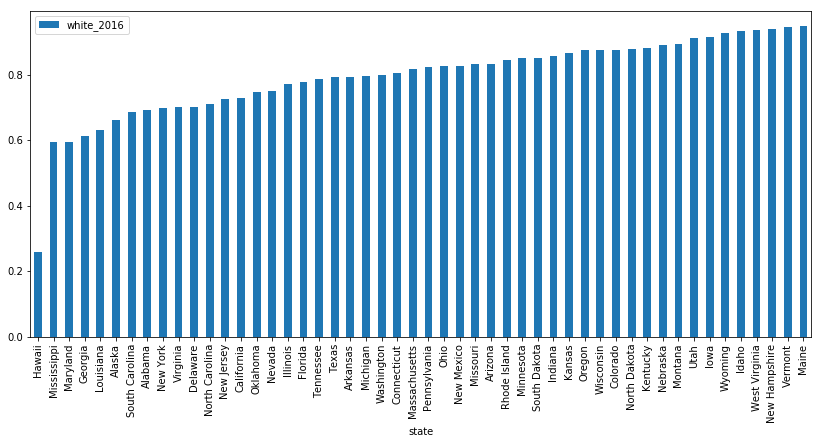

In [721]:
# Show a bar graph showing states ranked by number of permit checks for handguns in 2016
df_2016[['state','white_2016']].sort_values('white_2016').plot(kind='bar', x='state', figsize=(14,6));

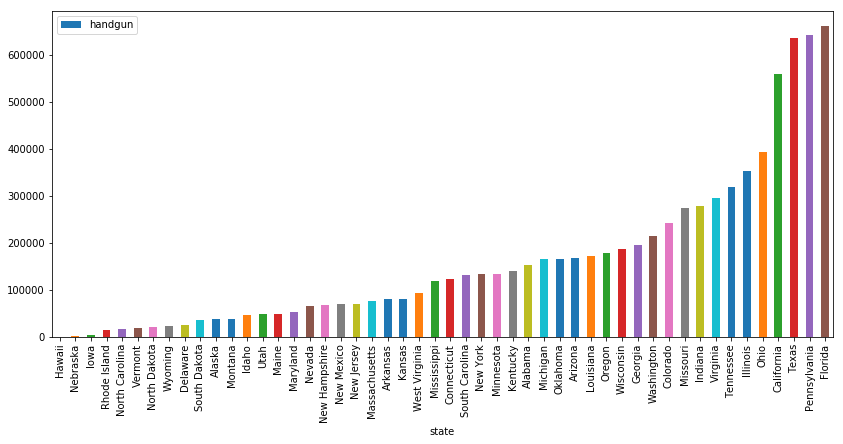

In [725]:
# Show a bar graph showing states rankedby population size
df_2016.sort_values('handgun').plot(kind='bar', x='state', y='handgun', figsize=(14,6));

The bar chart shows the top 5 states with the most amount of permit checks are:
1) Florida
2) Pennsylvania
3) Texas
4) California
5) Ohio

Florida, California and Texas are not that surprising to see at the top, as they are large states that tend to have a "gun-friendly" culture.  On the other hand, it is somewhat surprising that Pennsylvania and Ohio seem to have quite a high number as well.

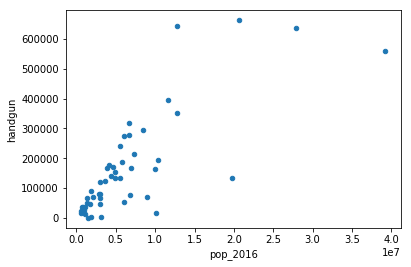

In [723]:
# Show a scatter plot between population counts and the number permit checks for handguns in 2016
df_2016.plot(x='pop_2016', y='handgun', kind='scatter')

### Research Question 2  (Replace this header name!)

In [724]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!